# Inteligência Artifical 2024.2
### Docente: Evandro
### Discentes: Antônio Wagner, Cícero Tenório e Vitória Bigi




# 1) Construa um agente conversacional (Chatbot) para uma aplicação a ser definida em sala de aula, usando um framework de sua livre escolha, mas já sugerindo o uso do framework Rasa.

Link para o Repositório com o Código da Questão: https://github.com/rogerioflh/ECOM031-Inteligencia-Artificial-UFAL

In [ ]:
!pip install rasa

# Criar arquivos
%%writefile domain.yml
version: "3.1"
intents:
  - cumprimentar
  - despedir
  - perguntar_produtos
  - perguntar_preco
  - finalizar_compra
responses:
  utter_ola:
    - text: "Olá! Bem-vindo à nossa loja. Como posso ajudar?"
  utter_tchau:
    - text: "Até mais! Volte sempre."
  utter_listar_produtos:
    - text: "Temos:\n- Camiseta (R$ 50)\n- Calça (R$ 100)\n- Tênis (R$ 150)"
  utter_perguntar_item:
    - text: "Qual produto você deseja comprar?"
  utter_confirmar_compra:
    - text: "Ótimo! Seu pedido de {produto} foi registrado. Obrigado!"

%%writefile data/nlu.yml
version: "3.1"
nlu:
- intent: cumprimentar
  examples: |
    - oi
    - olá
    - bom dia
- intent: despedir
  examples: |
    - tchau
    - até logo
- intent: perguntar_produtos
  examples: |
    - quais produtos vocês têm?
    - o que vendem?
- intent: finalizar_compra
  examples: |
    - quero comprar
    - finalizar pedido

%%writefile data/stories.yml
version: "3.1"
stories:
- story: cumprimento
  steps:
  - intent: cumprimentar
  - action: utter_ola
- story: listar produtos
  steps:
  - intent: perguntar_produtos
  - action: utter_listar_produtos

# Treinar e executar
!rasa train
!rasa shell

SyntaxError: invalid syntax (<ipython-input-1-3423f4edd656>, line 6)

## 2) Desenvolva, usando a ferramenta Scikit Fuzzy (ou uma outra de sua livre escolha), um sistema baseado em regras fuzzy para:

2.1) análise de risco de sucesso de projetos de software (a ser detalhada
pelo professor) ou

2.2) Controle de Temperatura de um Chuveiro, contendo uma evolução da
base de conhecimento a seguir. Sobre a solução a ser desenvolvida,
apresente:

a) Descrição do processo de modelagem, mostrando e discutindo as
funções de pertinência utilizadas na etapa de fuzzificação, bem como a
solução para etapa de defuzzificação), e discuta e mostre como é feita
a inferência sobre o conhecimento.

b) Execute e mostre esta aplicação rodando com o uso da ferramenta
Scikit-Fuzzy, mostrada em aula. Como entrega relativa à questão,
espera-se ainda uma documentação com todas as etapas citadas da
modelagem, assim como

(i) Descrição do problema, indicando claramente os
objetivos da aplicação, as variáveis usadas;

(ii) Descrição da solução;

(iii) Compartilhe o notebook utilizado pelo uso do

Scikit-Fuzzy.

Obs.: Considere a metodologia e inferência de Mamdani.

*a) Descrição do processo de modelagem, mostrando e discutindo as
funções de pertinência utilizadas na etapa de fuzzificação, bem como a
solução para etapa de defuzzificação, e discuta e mostre como é feita
a inferência sobre o conhecimento.*

Descrição do Problema: O objetivo do sistema fuzzy é controlar a abertura da válvula de água de um chuveiro com base em duas variáveis de entrada:
temperatura da água e fluxo de água. A ideia é garantir o conforto do usuário ajustando automaticamente a proporção de água quente e fria de acordo com a situação.

- Variáveis de entrada: Temperatura, Fluxo de água. Ambas variam de 0°C a 100°C.
- Variável de saída: Abertura da válvula. Varia de 0% a 100%.

Fuzzificação: Utilizamos três conjuntos fuzzy para cada variável de entrada e saída,
conforme segue:
- Temperatura:
    - Baixa: Entre 0°C e 50°C.
    - Média: Aproximadamente entre 25°C e 75°C.
    - Alta: Entre 50°C e 100°C.
- Fluxo de Água:
    - Baixo: Entre 0% e 50%.
    - Médio: Aproximadamente entre 25% e 75%.
    - Alto: Entre 50% e 100%.
- Abertura da Válvula:
    - Pequena: Entre 0% e 50%.
    - Moderada: Aproximadamente entre 25% e 75%.
    - Grande: Entre 50% e 100%.

As funções de pertinência foram implementadas utilizando funções triangulares
(trimf).

##Inferência Fuzzy
A inferência fuzzy de Mamdani é aplicada utilizando uma base de regras fornecida e melhorada, que correlaciona a temperatura e o fluxo de
água à abertura da válvula.

As regras são:
1. SE temperatura é baixa E fluxo de água é alto, ENTÃO abertura da válvula é
grande.
2. SE temperatura é baixa E fluxo de água é médio, ENTÃO abertura da válvula é
moderada.
3. SE temperatura é média E fluxo de água é alto, ENTÃO abertura da válvula é
moderada.
4. SE temperatura é média E fluxo de água é baixo, ENTÃO abertura da válvula é
pequena.
5. SE temperatura é alta E fluxo de água é baixo, ENTÃO abertura da válvula é
pequena.
6. SE temperatura é alta E fluxo de água é alto, ENTÃO abertura da válvula é
moderada.
7. SE temperatura é baixa E fluxo de água é baixo, ENTÃO abertura da válvula é
pequena.
8. SE temperatura é média E fluxo de água é médio, ENTÃO abertura da válvula é
moderada.
9. SE temperatura é alta E fluxo de água é médio, ENTÃO abertura da válvula é
moderada.

##Defuzzificação
Após aplicar as regras fuzzy e obter os conjuntos fuzzy resultantes, a defuzzificação converte os valores fuzzy em uma saída exata (crisp) que é usada para determinar o quanto a válvula deve ser aberta. Foi utilizado o método do centroide, que calcula o centro de gravidade do conjunto fuzzy resultante.


In [ ]:
!pip install scikit-fuzzy

In [ ]:
# Importação das bibliotecas
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

Ajuste da válvula: 87.33%


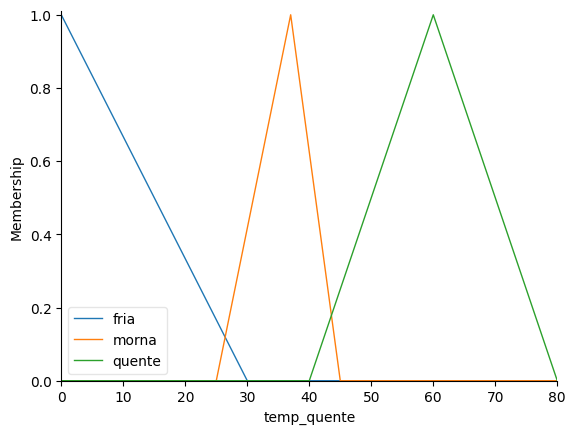

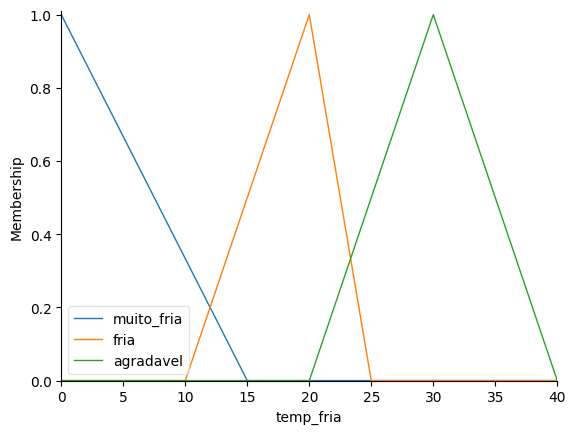

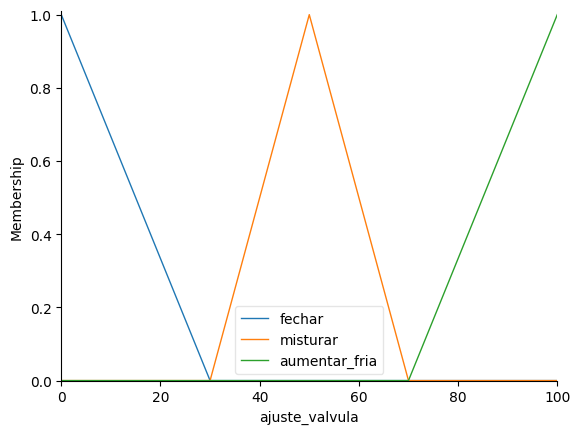

In [ ]:
# 1. Definindo variáveis de entrada e saída
temp_quente = ctrl.Antecedent(np.arange(0, 81, 1), 'temp_quente')
temp_fria = ctrl.Antecedent(np.arange(0, 41, 1), 'temp_fria')
ajuste_valvula = ctrl.Consequent(np.arange(0, 101, 1), 'ajuste_valvula')

# 2. Funções de pertinência
# Temperatura da Água Quente
temp_quente['fria'] = fuzz.trimf(temp_quente.universe, [0, 0, 30])
temp_quente['morna'] = fuzz.trimf(temp_quente.universe, [25, 37, 45])
temp_quente['quente'] = fuzz.trimf(temp_quente.universe, [40, 60, 80])

# Temperatura da Água Fria
temp_fria['muito_fria'] = fuzz.trimf(temp_fria.universe, [0, 0, 15])
temp_fria['fria'] = fuzz.trimf(temp_fria.universe, [10, 20, 25])
temp_fria['agradavel'] = fuzz.trimf(temp_fria.universe, [20, 30, 40])

# Ajuste da Válvula
ajuste_valvula['fechar'] = fuzz.trimf(ajuste_valvula.universe, [0, 0, 30])
ajuste_valvula['misturar'] = fuzz.trimf(ajuste_valvula.universe, [30, 50, 70])
ajuste_valvula['aumentar_fria'] = fuzz.trimf(ajuste_valvula.universe, [70, 100, 100])

# 3. Regras de inferência
regra1 = ctrl.Rule(temp_quente['quente'] & temp_fria['muito_fria'], ajuste_valvula['aumentar_fria'])
regra2 = ctrl.Rule(temp_quente['morna'] & temp_fria['fria'], ajuste_valvula['misturar'])
regra3 = ctrl.Rule(temp_quente['fria'] & temp_fria['muito_fria'], ajuste_valvula['fechar'])
regra4 = ctrl.Rule(temp_quente['morna'] & temp_fria['agradavel'], ajuste_valvula['misturar'])
regra5 = ctrl.Rule(temp_quente['quente'] & temp_fria['fria'], ajuste_valvula['misturar'])
regra6 = ctrl.Rule(temp_quente['fria'] & temp_fria['agradavel'], ajuste_valvula['fechar'])

# 4. Sistema de Controle
sistema_controle = ctrl.ControlSystem([regra1, regra2, regra3, regra4, regra5, regra6])
simulador = ctrl.ControlSystemSimulation(sistema_controle)

# 5. Simulação de exemplo
simulador.input['temp_quente'] = 50  # exemplo: água quente a 50°C
simulador.input['temp_fria'] = 10    # exemplo: água fria a 10°C

simulador.compute()

print(f"Ajuste da válvula: {simulador.output['ajuste_valvula']:.2f}%")

#  Mostrar gráficos
temp_quente.view()
temp_fria.view()
ajuste_valvula.view()


##3) Apresente e discuta um exemplo de aplicação de rede bayesiana para realizar um sistema de diagnóstico médico, apresentando modelagem das relações entre os sintomas e o diagóstico da doença. Apresente a solução de representação de conhecimento que você construiu e mostre o funcionamento da inferência, ilustrando com alguns exemplos. Utilize a ferramenta nética (ou alguma outra de sua livre escolha) para realizar essa aplicação.

Obs.: Considere apreciar o exemplo do sistema de alarme (do livro de IA
do Stuart Russell e Peter Norvig) amplamente disponível, pois a
explicação desse exemplo ajudará bastante no entendimento ou
formulação de outro. Um outro exemplo de aplicação está disponível na
ferramenta Netica sobre Aplicação de diagnóstico médico, mas não poderá
ser usado como a aplicação aqui solicitada.

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [ ]:
class EnxaquecaFuzzySystem:
    def __init__(self):
        # Definindo as variáveis de entrada
        self.frequencia = ctrl.Antecedent(np.arange(0, 31, 1), 'frequencia')  # dias com dor por mês
        self.intensidade = ctrl.Antecedent(np.arange(0, 11, 1), 'intensidade')  # escala de 0-10
        self.duracao = ctrl.Antecedent(np.arange(0, 25, 1), 'duracao')  # horas por crise
        self.medicamento = ctrl.Antecedent(np.arange(0, 11, 1), 'medicamento')  # uso de analgésicos por semana

        # Variável de saída
        self.cronicidade = ctrl.Consequent(np.arange(0, 101, 1), 'cronicidade')  # probabilidade de enxaqueca crônica

        # Funções de pertinência para frequência
        self.frequencia['baixa'] = fuzz.trapmf(self.frequencia.universe, [0, 0, 4, 8])
        self.frequencia['moderada'] = fuzz.trapmf(self.frequencia.universe, [6, 9, 14, 15])
        self.frequencia['alta'] = fuzz.trapmf(self.frequencia.universe, [14, 15, 30, 30])

        # Funções de pertinência para intensidade
        self.intensidade['leve'] = fuzz.trapmf(self.intensidade.universe, [0, 0, 3, 5])
        self.intensidade['moderada'] = fuzz.trapmf(self.intensidade.universe, [4, 5, 7, 8])
        self.intensidade['severa'] = fuzz.trapmf(self.intensidade.universe, [7, 8, 10, 10])

        # Funções de pertinência para duração
        self.duracao['curta'] = fuzz.trapmf(self.duracao.universe, [0, 0, 4, 8])
        self.duracao['media'] = fuzz.trapmf(self.duracao.universe, [6, 10, 16, 18])
        self.duracao['longa'] = fuzz.trapmf(self.duracao.universe, [16, 18, 24, 24])

        # Funções de pertinência para uso de medicamentos
        self.medicamento['pouco'] = fuzz.trapmf(self.medicamento.universe, [0, 0, 2, 4])
        self.medicamento['moderado'] = fuzz.trapmf(self.medicamento.universe, [3, 5, 6, 7])
        self.medicamento['excessivo'] = fuzz.trapmf(self.medicamento.universe, [6, 7, 10, 10])

        # Funções de pertinência para cronicidade
        self.cronicidade['baixa'] = fuzz.trapmf(self.cronicidade.universe, [0, 0, 30, 45])
        self.cronicidade['moderada'] = fuzz.trapmf(self.cronicidade.universe, [35, 45, 65, 75])
        self.cronicidade['alta'] = fuzz.trapmf(self.cronicidade.universe, [65, 75, 100, 100])

        self.create_rules()

        self.sistema_ctrl = ctrl.ControlSystem(self.rules)
        self.sistema = ctrl.ControlSystemSimulation(self.sistema_ctrl)

    def create_rules(self):
        """Criação das regras do sistema fuzzy para enxaqueca crônica"""
        self.rules = [
            # Regras para alta cronicidade
            ctrl.Rule(
                self.frequencia['alta'] &
                (self.intensidade['moderada'] | self.intensidade['severa']),
                self.cronicidade['alta']
            ),

            ctrl.Rule(
                self.medicamento['excessivo'] &
                self.frequencia['moderada'],
                self.cronicidade['alta']
            ),

            ctrl.Rule(
                self.frequencia['alta'] &
                self.duracao['longa'],
                self.cronicidade['alta']
            ),

            # Regras para moderada cronicidade
            ctrl.Rule(
                self.frequencia['moderada'] &
                self.intensidade['moderada'],
                self.cronicidade['moderada']
            ),

            ctrl.Rule(
                self.medicamento['moderado'] &
                self.frequencia['moderada'],
                self.cronicidade['moderada']
            ),

            ctrl.Rule(
                self.frequencia['baixa'] &
                self.intensidade['severa'] &
                self.duracao['longa'],
                self.cronicidade['moderada']
            ),

            # Regras para baixa cronicidade
            ctrl.Rule(
                self.frequencia['baixa'] &
                (self.intensidade['leve'] | self.intensidade['moderada']),
                self.cronicidade['baixa']
            ),

            ctrl.Rule(
                self.medicamento['pouco'] &
                self.frequencia['baixa'],
                self.cronicidade['baixa']
            )
        ]

    def evaluate(self, freq_valor, int_valor, dur_valor, med_valor):
        try:
            self.sistema.input['frequencia'] = freq_valor
            self.sistema.input['intensidade'] = int_valor
            self.sistema.input['duracao'] = dur_valor
            self.sistema.input['medicamento'] = med_valor
            self.sistema.compute()
            cronicidade_valor = self.sistema.output['cronicidade']

            if cronicidade_valor >= 70:
                categoria = "Alta Probabilidade de Crônica"
            elif cronicidade_valor >= 40:
                categoria = "Probabilidade Moderada"
            else:
                categoria = "Baixa Probabilidade"

            explicacao = self.gerar_explicacao(freq_valor, int_valor, dur_valor, med_valor, cronicidade_valor)

            return cronicidade_valor, categoria, explicacao

        except Exception as e:
            return None, "Erro", f"Erro no processamento: {str(e)}"

    def gerar_explicacao(self, frequencia, intensidade, duracao, medicamento, cronicidade):
        explicacao = []

        if frequencia >= 15:
            explicacao.append("- Frequência muito alta de crises (enxaqueca crônica provável)")
        elif frequencia >= 9:
            explicacao.append("- Frequência moderada-alta de crises")
        else:
            explicacao.append("- Frequência baixa de crises")

        if intensidade >= 8:
            explicacao.append("- Intensidade severa das dores")
        elif intensidade >= 5:
            explicacao.append("- Intensidade moderada das dores")
        else:
            explicacao.append("- Intensidade leve das dores")

        if duracao >= 16:
            explicacao.append("- Duração muito longa das crises")
        elif duracao >= 10:
            explicacao.append("- Duração moderada das crises")
        else:
            explicacao.append("- Duração curta das crises")

        if medicamento >= 4:
            explicacao.append("- Uso excessivo de medicamentos (risco de cefaleia rebote)")
        elif medicamento >= 2:
            explicacao.append("- Uso moderado de medicamentos")
        else:
            explicacao.append("- Uso baixo de medicamentos")

        explicacao.append(f"\nProbabilidade de enxaqueca crônica: {cronicidade:.1f}%")

        return "\n".join(explicacao)


def interface_usuario():
    """Interface para interação com o usuário"""
    sistema = EnxaquecaFuzzySystem()

    print("\nSistema de Avaliação de Enxaqueca Crônica (Fuzzy)")
    print("------------------------------------------------")

    try:
        print("\nInforme os dados sobre suas crises de enxaqueca:")
        frequencia = float(input("Quantos dias por mês você tem dor de cabeça? (0-30): "))
        intensidade = float(input("Intensidade média da dor (0-10, onde 0 é sem dor e 10 é a pior dor imaginável): "))
        duracao = float(input("Duração média das crises em horas no dia: "))
        medicamento = float(input("Quantos dias por semana você usa analgésicos para dor de cabeça? (0-7): "))

        cronicidade_valor, categoria, explicacao = sistema.evaluate(
            frequencia, intensidade, duracao, medicamento)

        print("\nRESULTADO DA AVALIAÇÃO")
        print("---------------------")
        print(f"\nCategoria: {categoria}")
        print("\nAnálise detalhada:")
        print(explicacao)

        print("\nRecomendações:")
        if "Alta" in categoria:
            print("- Consulte urgentemente um especialista em cefaleias")
            print("- Pode ser necessário tratamento preventivo específico")
            print("- Reduza gradualmente o uso excessivo de analgésicos com orientação médica")
        elif "Moderada" in categoria:
            print("- Agende uma consulta com neurologista ou clínico")
            print("- Mantenha um diário da enxaqueca para acompanhamento")
            print("- Considere terapias não medicamentosas (relaxamento, biofeedback)")
        else:
            print("- Mantenha hábitos saudáveis para prevenir crises")
            print("- Evite gatilhos conhecidos (estresse, certos alimentos, etc.)")
            print("- Use analgésicos com moderação quando necessário")

    except ValueError:
        print("\nErro: Por favor, insira valores numéricos válidos.")
        return


if __name__ == "__main__":
    interface_usuario()


Sistema de Avaliação de Enxaqueca Crônica (Fuzzy)
------------------------------------------------

Informe os dados sobre suas crises de enxaqueca:
Quantos dias por mês você tem dor de cabeça? (0-30): 16
Intensidade média da dor (0-10, onde 0 é sem dor e 10 é a pior dor imaginável): 8
Duração média das crises em horas no dia: 16
Quantos dias por semana você usa analgésicos para dor de cabeça? (0-7): 5

RESULTADO DA AVALIAÇÃO
---------------------

Categoria: Alta Probabilidade de Crônica

Análise detalhada:
- Frequência muito alta de crises (enxaqueca crônica provável)
- Intensidade severa das dores
- Duração muito longa das crises
- Uso excessivo de medicamentos (risco de cefaleia rebote)

Probabilidade de enxaqueca crônica: 84.9%

Recomendações:
- Consulte urgentemente um especialista em cefaleias
- Pode ser necessário tratamento preventivo específico
- Reduza gradualmente o uso excessivo de analgésicos com orientação médica


##4) Desenvolva e discuta um sistema baseado em conhecimento, usando ontologia (OWL: Ontology Web Language) como solução para representão de conhecimento, tendo a finalidade de recomendar de vinho para acompanhar um determinado jantar, ou seja, sugerir boas combinações de vinhos e comidas, auxiliando nas decisões de clientes de um determinado restaurante (ou de uma loja). Além disso, você deveria:


###a) Representação do Conhecimento Utilizada Na ontologia simplificada, temos duas classes principais: Vinho e Comida. Essas classes são divididas em subclasses específicas para refletir os tipos de vinhos e os tipos de comida disponíveis.

Estrutura da Ontologia:

##1. Classes Principais:
- Vinho: Representa todos os tipos de vinhos.
- Comida: Representa todos os tipos de comida.

##2. Subclasses:
- Vinho Tinto (subclasse de Vinho): Inclui vinhos tintos específicos como **Cabernet Sauvignon, Malbec, e Pinot Noir.**

- Vinho Branco (subclasse de Vinho): Inclui vinhos brancos como **Chardonnay e Sauvignon Blanc.**
- Carne (subclasse de Comida): Inclui tipos de carne como **Filé Mignon,
Costela, e Churrasco.**
- Peixe (subclasse de Comida): Inclui pratos de peixe como **Peixe Grelhado e Salmão.**

- Propriedades:
    - combinaCom: Esta é uma propriedade de objeto que liga um tipo de Vinho a um tipo de Comida.


##b) Discutir como é feita a inferência (raciocínio) sobre o conhecimento

A inferência neste sistema é feita através da análise das propriedades e das relações estabelecidas entre os vinhos e as comidas. O raciocinador usa as regras definidas para sugerir automaticamente combinações de vinhos e comidas com base nas informações representadas.<br>
Como a Inferência Funciona:

##1. Raciocínio Dedutivo:
 O sistema utiliza a lógica descritiva para verificar quais vinhos combinam com quais comidas, de acordo com as relações definidas pela propriedade combinaCom.
- Por exemplo, se foi definida a regra de que Vinho Tinto combina com Carne, o sistema deduz que vinhos como Cabernet Sauvignon devem ser
recomendados com pratos como Filé Mignon.

##2. Regras Simples de Combinação:
- Vinho Tinto → Carne: Todos os vinhos tintos são recomendados para pratos de carne.
- Vinho Branco → Peixe: Todos os vinhos brancos são recomendados para
pratos de peixe.

##3. Uso do Raciocinador no Protégé:
Quando o raciocinador (como o HermiT) é ativado, ele verifica se as
combinações são consistentes e realiza inferências baseadas nas regras. O sistema, então, sugere que, por exemplo, o Cabernet Sauvignon deve ser
combinado com Filé Mignon e o Sauvignon Blanc deve ser combinado com
Salmão

In [ ]:
@prefix : <http://www.semanticweb.org/antoniow/ontologies/2025/04/untitled-ontology-3/> .
@prefix owl: <http://www.w3.org/2002/07/owl#> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix xml: <http://www.w3.org/XML/1998/namespace> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@base <http://www.semanticweb.org/antoniow/ontologies/2025/04/untitled-ontology-3/> .

<http://www.semanticweb.org/antoniow/ontologies/2025/04/untitled-ontology-3> rdf:type owl:Ontology .

#################################################################
#    Object Properties
#################################################################

###  http://www.semanticweb.org/antoniow/ontologies/2025/04/untitled-ontology-3#combinaCom
:combinaCom rdf:type owl:ObjectProperty ,
                     owl:FunctionalProperty ;
            rdfs:domain :Vinho ;
            rdfs:range :Comida .


#################################################################
#    Classes
#################################################################

###  http://www.semanticweb.org/antoniow/ontologies/2025/04/untitled-ontology-3#Carne
:Carne rdf:type owl:Class ;
       rdfs:subClassOf :Comida .


###  http://www.semanticweb.org/antoniow/ontologies/2025/04/untitled-ontology-3#Comida
:Comida rdf:type owl:Class ;
        owl:disjointWith :Vinho .


###  http://www.semanticweb.org/antoniow/ontologies/2025/04/untitled-ontology-3#Peixe
:Peixe rdf:type owl:Class ;
       rdfs:subClassOf :Comida .


###  http://www.semanticweb.org/antoniow/ontologies/2025/04/untitled-ontology-3#Vinho
:Vinho rdf:type owl:Class .


###  http://www.semanticweb.org/antoniow/ontologies/2025/04/untitled-ontology-3#VinhoBranco
:VinhoBranco rdf:type owl:Class ;
             rdfs:subClassOf :Vinho .


###  http://www.semanticweb.org/antoniow/ontologies/2025/04/untitled-ontology-3#VinhoTinto
:VinhoTinto rdf:type owl:Class ;
            rdfs:subClassOf :Vinho .


#################################################################
#    Individuals
#################################################################

###  http://www.semanticweb.org/antoniow/ontologies/2025/04/untitled-ontology-3#CabernetSauvignon
:CabernetSauvignon rdf:type owl:NamedIndividual ,
                            :VinhoTinto ;
                   :combinaCom :Churrasco ,
                               :Costela ,
                               :FileMignon .


###  http://www.semanticweb.org/antoniow/ontologies/2025/04/untitled-ontology-3#Chardonnay
:Chardonnay rdf:type owl:NamedIndividual ,
                     :VinhoBranco ;
            :combinaCom :PeixeGrelhado ,
                        :Salmão .


###  http://www.semanticweb.org/antoniow/ontologies/2025/04/untitled-ontology-3#Churrasco
:Churrasco rdf:type owl:NamedIndividual ,
                    :Carne .


###  http://www.semanticweb.org/antoniow/ontologies/2025/04/untitled-ontology-3#Costela
:Costela rdf:type owl:NamedIndividual ,
                  :Carne .


###  http://www.semanticweb.org/antoniow/ontologies/2025/04/untitled-ontology-3#FileMignon
:FileMignon rdf:type owl:NamedIndividual ,
                     :Carne .


###  http://www.semanticweb.org/antoniow/ontologies/2025/04/untitled-ontology-3#Malbec
:Malbec rdf:type owl:NamedIndividual ,
                 :VinhoTinto ;
        :combinaCom :Churrasco ,
                    :FileMignon .


###  http://www.semanticweb.org/antoniow/ontologies/2025/04/untitled-ontology-3#PeixeGrelhado
:PeixeGrelhado rdf:type owl:NamedIndividual ,
                        :Peixe .


###  http://www.semanticweb.org/antoniow/ontologies/2025/04/untitled-ontology-3#PinotNoir
:PinotNoir rdf:type owl:NamedIndividual ,
                    :VinhoTinto ;
           :combinaCom :Salmão .


###  http://www.semanticweb.org/antoniow/ontologies/2025/04/untitled-ontology-3#Salmão
:Salmão rdf:type owl:NamedIndividual ,
                 :Peixe .


###  http://www.semanticweb.org/antoniow/ontologies/2025/04/untitled-ontology-3#SauvignonBlanc
:SauvignonBlanc rdf:type owl:NamedIndividual ,
                         :VinhoBranco ;
                :combinaCom :PeixeGrelhado .


###  Generated by the OWL API (version 5.5.17.2024-09-13T12:11:03Z) https://github.com/owlcs/owlapi


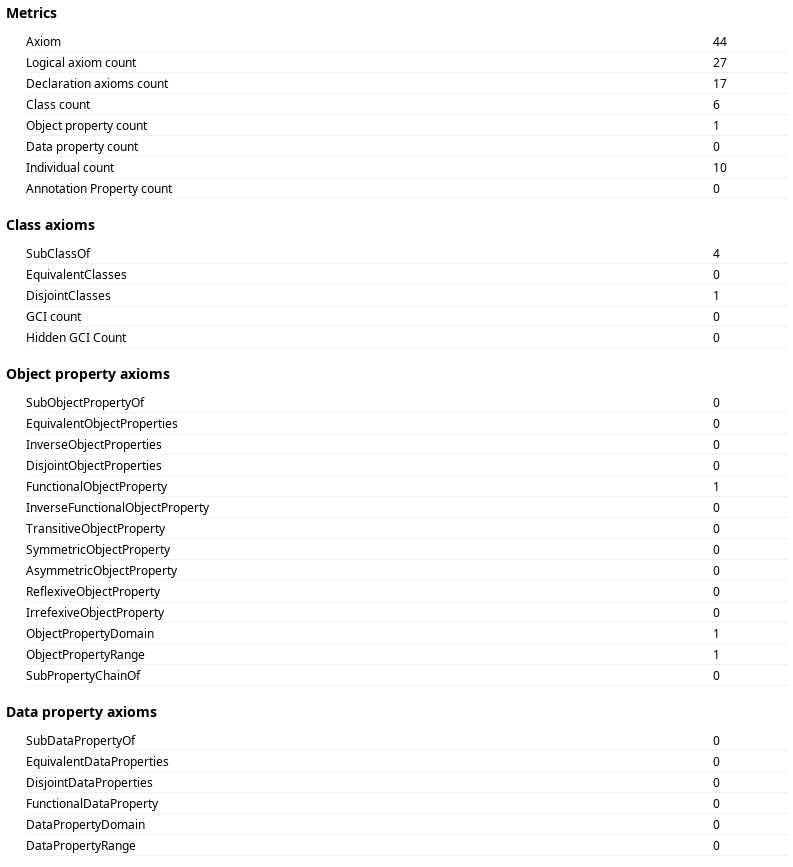

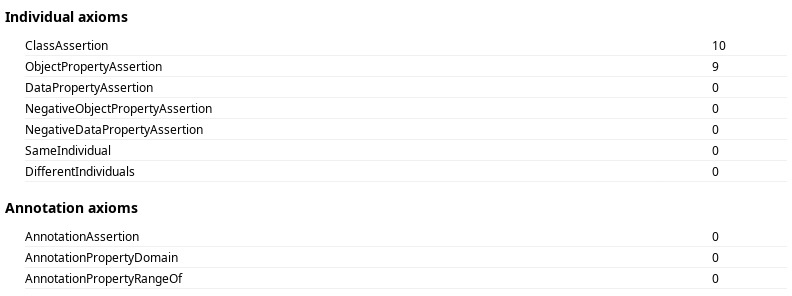

##5) Sobre a técnica de raciocínio baseado em casos, desenvolva um protótipo funcional de um sistema de diagnóstico médico baseado em casos para identificar possíveis doenças com base em sintomas relatados pelo paciente. Os sintomas fornecidos serão comparados com casos anteriores para identificar possíveis doenças e recomendar tratamentos. Apresente solução para as seguintes etapas:


(5.1) Indexação e representação de casos: crie uma base de casos contendo
informações sobre diagnósticos medicos anteriores, incluindo sintomas
relatados pelo paciente e doença diagnosticada.

(5.2) Recuperação de casos: Implemente uma função que permita ao Sistema
receber como entrada sintomas relatados pelo paciente, daí utilize um
algoritmo de recuperação de casos para encontrar casos similares na base de
casos, comparando os sintomas relatados pelo paciente com os casos
armazenados.

(5.3) Apresente o diagnóstico.

(5.4) Use uma ferramenta para realizar essa aplicação (ex.: MyCBR ou
JColibri ou Scikit-CBR ou PyCBR)

In [ ]:
import numpy as np
import pandas as pd
from typing import List, Dict, Tuple
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

class CasoMedico:
    def __init__(self, id: int, sintomas: List[str], diagnostico: str, tratamento: str):
        self.id = id
        self.sintomas = sintomas
        self.diagnostico = diagnostico
        self.tratamento = tratamento

class SistemaDiagnosticoMedico:
    def __init__(self):
        self.base_casos: List[CasoMedico] = []
        self.vectorizer = TfidfVectorizer()

    def criar_base_casos(self):
        casos = [
            CasoMedico(1, ["dor de garganta", "tosse seca", "congestão nasal", "febre baixa"], "Resfriado", "Descanso, líquidos quentes e pastilhas"),
            CasoMedico(2, ["dor abdominal", "náusea", "vômito", "diarreia"], "Gastroenterite", "Hidratação, dieta leve e probióticos"),
            CasoMedico(3, ["dor de cabeça intensa", "sensibilidade à luz", "náusea", "fadiga"], "Enxaqueca", "Ambiente escuro, medicação específica e repouso"),
            CasoMedico(4, ["febre alta", "dor de cabeça", "fadiga", "dores musculares"], "Gripe", "Repouso, hidratação e antitérmicos"),
            CasoMedico(5, ["tosse com catarro", "febre", "falta de ar", "dor no peito"], "Pneumonia", "Antibióticos, repouso e acompanhamento médico"),
        ]
        self.base_casos.extend(casos)
        todos_sintomas = [" ".join(caso.sintomas) for caso in self.base_casos]
        self.vectorizer.fit(todos_sintomas)


      #recupeando casos similares
    def recuperar_casos_similares(self, sintomas_paciente: List[str], n_casos: int = 3) -> List[Tuple[CasoMedico, float]]:
        sintomas_texto = " ".join(sintomas_paciente)
        todos_sintomas = [" ".join(caso.sintomas) for caso in self.base_casos]
        todos_sintomas.insert(0, sintomas_texto)
        tfidf_matrix = self.vectorizer.transform(todos_sintomas)
        similaridades = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:])
        indices_similares = np.argsort(similaridades[0])[-n_casos:][::-1]
        casos_similares = []
        for idx in indices_similares:
            caso = self.base_casos[idx]
            similaridade = similaridades[0][idx]
            casos_similares.append((caso, similaridade))
        return casos_similares

    def diagnosticar(self, sintomas_paciente: List[str]) -> Dict:
        casos_similares = self.recuperar_casos_similares(sintomas_paciente)
        if not casos_similares:
            return {
                "status": "Sem diagnóstico",
                "mensagem": "Não foram encontrados casos similares na base.",
                "casos_similares": []
            }
        resultado = {
            "status": "Diagnóstico realizado",
            "casos_similares": [],
            "recomendacao": "Consulte um médico para confirmação do diagnóstico."
        }
        for caso, similaridade in casos_similares:
            resultado["casos_similares"].append({
                "diagnostico": caso.diagnostico,
                "similaridade": f"{similaridade:.2%}",
                "tratamento": caso.tratamento,
                "sintomas_originais": caso.sintomas
            })
        return resultado

def demonstracao_sistema():
    sistema = SistemaDiagnosticoMedico()
    sistema.criar_base_casos()
    sintomas_paciente = ["febre alta", "dor de cabeça", "fadiga", "dores musculares", "tosse com catarro"]
    resultado = sistema.diagnosticar(sintomas_paciente)
    print("\nSintomas do paciente:", ", ".join(sintomas_paciente))
    print("\nResultados encontrados:")
    print("-" * 30)
    for idx, caso in enumerate(resultado["casos_similares"], 1):
        print(f"\nCaso similar #{idx}")
        print(f"Diagnóstico: {caso['diagnostico']}")
        print(f"Similaridade: {caso['similaridade']}")
        print(f"Tratamento: {caso['tratamento']}")
        print(f"Sintomas de casos anteriores: {', '.join(caso['sintomas_originais'])}")
    print("\nRecomendação:", resultado["recomendacao"])

def demonstracao_sistema2():
    sistema = SistemaDiagnosticoMedico()
    sistema.criar_base_casos()
    sintomas_paciente = ["fadiga", "dor de cabeça intensa", "sensibilidade à luz"]
    resultado = sistema.diagnosticar(sintomas_paciente)
    print("")
    print("")
    print("\nSintomas do paciente:", ", ".join(sintomas_paciente))
    print("\nResultados encontrados:")
    print("-" * 30)
    for idx, caso in enumerate(resultado["casos_similares"], 1):
        print(f"\nCaso similar #{idx}")
        print(f"Diagnóstico: {caso['diagnostico']}")
        print(f"Similaridade: {caso['similaridade']}")
        print(f"Tratamento: {caso['tratamento']}")
        print(f"Sintomas de casos anteriores: {', '.join(caso['sintomas_originais'])}")
    print("\nRecomendação:", resultado["recomendacao"])

demonstracao_sistema()
demonstracao_sistema2()


Sintomas do paciente: febre alta, dor de cabeça, fadiga, dores musculares, tosse com catarro

Resultados encontrados:
------------------------------

Caso similar #1
Diagnóstico: Gripe
Similaridade: 81.63%
Tratamento: Repouso, hidratação e antitérmicos
Sintomas de casos anteriores: febre alta, dor de cabeça, fadiga, dores musculares

Caso similar #2
Diagnóstico: Pneumonia
Similaridade: 46.76%
Tratamento: Antibióticos, repouso e acompanhamento médico
Sintomas de casos anteriores: tosse com catarro, febre, falta de ar, dor no peito

Caso similar #3
Diagnóstico: Enxaqueca
Similaridade: 27.94%
Tratamento: Ambiente escuro, medicação específica e repouso
Sintomas de casos anteriores: dor de cabeça intensa, sensibilidade à luz, náusea, fadiga

Recomendação: Consulte um médico para confirmação do diagnóstico.



Sintomas do paciente: fadiga, dor de cabeça intensa, sensibilidade à luz

Resultados encontrados:
------------------------------

Caso similar #1
Diagnóstico: Enxaqueca
Similaridade: 